In [1]:
from lib.vdbc.dataset_factory import VDBC
from tools.solverwrapper import SolverWrapper


In [2]:
import os

In [3]:

ROOT = '.'
dbtype = 'OTB'
dbpath = os.path.join(ROOT, 'data', dbtype)
gtpath = dbpath
output_dir = os.path.join(ROOT, 'model')
solver_prototxt = os.path.join(output_dir, 'solver.prototxt')
pretrained_model = os.path.join(output_dir, 'vggm.caffemodel')

EXCLUDE_SET = {
    'vot2014': ['Basketball', 'Bolt', 'David', 'Diving',
                'MotorRolling', 'Skating1', 'Trellis', 'Woman']}



In [4]:
vdbc = VDBC(dbtype=dbtype, dbpath=dbpath, gtpath=gtpath, flush=True)
vdbc.del_exclude(EXCLUDE_SET['vot2014'])

save image_list.json successfully.
save gt_info.json successfully.
VDBC instance built.


In [5]:
print('VDBC instance built.')

num_frame = vdbc.get_frame_count()
max_iters = 64 * 4 * num_frame
snapshot_iters = 64 * num_frame
print('Total number of frames: {}'.format(num_frame))
print('Max iterations: {}'.format(max_iters))


VDBC instance built.
Total number of frames: 945
Max iterations: 241920


In [6]:

from easydict import EasyDict

__C = EasyDict()

# python layer file can import layer_config.cfg to get the default configuration
cfg = __C

__C.TRAIN = EasyDict()

__C.TRAIN.INPUT_SIZE = 107

# 256 samples for each image
__C.TRAIN.IMS_PER_BATCH = 64

__C.TRAIN.PARAMS = (0.2, 0.2, 0.05, 0.7, 0.3)

In [7]:
db = vdbc.build_data_in_list_order(cfg.TRAIN.PARAMS,cfg.TRAIN.IMS_PER_BATCH, 'TRAIN')

[VDBC] Data of video set Suv is built and ID is 0.


In [43]:
vdbc.

<method-wrapper '__ne__' of VDBC object at 0x7fd20fc70278>

In [42]:
len(db)

30

In [36]:
a = db[1]
a.keys()

dict_keys(['path', 'gt', 'samples', 'img'])

In [45]:
len(a)

4

In [37]:
a['path']

'./data/OTB/Suv/img/0185.jpg'

In [38]:
s = a['samples']

In [32]:
s[0].keys()

dict_keys(['box', 'overlap', 'label', 'img'])

In [28]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

In [39]:
img = s[0]['img']

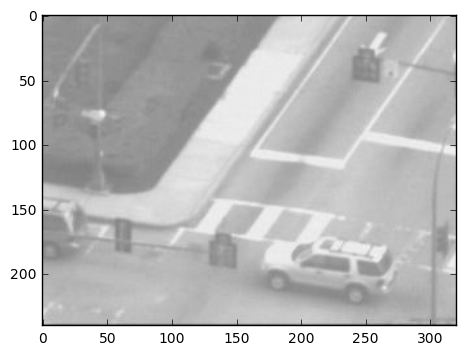

In [40]:
plt.imshow(img)

In [17]:
for i in s:
    print(i['path'])

./data/OTB/Suv/img/0182.jpg
./data/OTB/Suv/img/0185.jpg
./data/OTB/Suv/img/0575.jpg
./data/OTB/Suv/img/0580.jpg
./data/OTB/Suv/img/0587.jpg
./data/OTB/Suv/img/0595.jpg
./data/OTB/Suv/img/0597.jpg
./data/OTB/Suv/img/0601.jpg
./data/OTB/Suv/img/0604.jpg
./data/OTB/Suv/img/0629.jpg
./data/OTB/Suv/img/0646.jpg
./data/OTB/Suv/img/0658.jpg
./data/OTB/Suv/img/0659.jpg
./data/OTB/Suv/img/0661.jpg
./data/OTB/Suv/img/0664.jpg
./data/OTB/Suv/img/0665.jpg
./data/OTB/Suv/img/0666.jpg
./data/OTB/Suv/img/0671.jpg
./data/OTB/Suv/img/0672.jpg
./data/OTB/Suv/img/0675.jpg
./data/OTB/Suv/img/0678.jpg
./data/OTB/Suv/img/0683.jpg
./data/OTB/Suv/img/0684.jpg
./data/OTB/Suv/img/0687.jpg
./data/OTB/Suv/img/0794.jpg
./data/OTB/Suv/img/0805.jpg
./data/OTB/Suv/img/0823.jpg
./data/OTB/Suv/img/0833.jpg
./data/OTB/Suv/img/0845.jpg
./data/OTB/Suv/img/0861.jpg


In [44]:
s

[{'box': (180, 183, 84, 32), 'img': array([[[152, 152, 152],
          [152, 152, 152],
          [153, 153, 153],
          ..., 
          [187, 187, 187],
          [186, 186, 186],
          [186, 186, 186]],
  
         [[152, 152, 152],
          [153, 153, 153],
          [153, 153, 153],
          ..., 
          [186, 186, 186],
          [186, 186, 186],
          [186, 186, 186]],
  
         [[153, 153, 153],
          [153, 153, 153],
          [154, 154, 154],
          ..., 
          [185, 185, 185],
          [186, 186, 186],
          [188, 188, 188]],
  
         ..., 
         [[204, 204, 204],
          [201, 201, 201],
          [195, 195, 195],
          ..., 
          [170, 170, 170],
          [181, 181, 181],
          [193, 193, 193]],
  
         [[206, 206, 206],
          [211, 211, 211],
          [213, 213, 213],
          ..., 
          [190, 190, 190],
          [197, 197, 197],
          [204, 204, 204]],
  
         [[110, 110, 110],
          [128